# Notebook to read a dataset and do basic field statistics and distributions

Note that if you want to make distributions for a DQR you will need to modify this notebook, in particular 
make a custom picture for each field that uses good choices of ranges and log scale.

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()
print('LOAD DURATION: ', dt.datetime.now() - start_time)

/Users/ranji/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


LOAD DURATION:  0:00:00.000049


In [2]:
# if you want to see all the library versions loaded:
# %pip list

In [3]:
%%time
data = pd.read_csv('card transactions.csv')

CPU times: user 85.6 ms, sys: 20.3 ms, total: 106 ms
Wall time: 120 ms


In [4]:
data.dropna(how='all', axis=1, inplace=True) # drop any empty columns
print('data.shape=',data.shape)
print(data.info())
data.head().transpose()

data.shape= (97852, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97852 entries, 0 to 97851
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             97852 non-null  int64  
 1   Cardnum            97852 non-null  int64  
 2   Date               97852 non-null  object 
 3   Merchnum           94455 non-null  object 
 4   Merch description  97852 non-null  object 
 5   Merch state        96649 non-null  object 
 6   Merch zip          93149 non-null  float64
 7   Transtype          97852 non-null  object 
 8   Amount             97852 non-null  float64
 9   Fraud              97852 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.5+ MB
None


,0,1,2,3,4
Recnum,1,2,3,4,5
Cardnum,5142190439,5142183973,5142131721,5142148452,5142190439
Date,1/1/10,1/1/10,1/1/10,1/1/10,1/1/10
Merchnum,5509006296254,61003026333,4503082993600,5509006296254,5509006296254
Merch description,FEDEX SHP 12/23/09 AB#,SERVICE MERCHANDISE #81,OFFICE DEPOT #191,FEDEX SHP 12/28/09 AB#,FEDEX SHP 12/23/09 AB#
Merch state,TN,MA,MD,TN,TN
Merch zip,38118.0,1803.0,20706.0,38118.0,38118.0
Transtype,P,P,P,P,P
Amount,3.62,31.42,178.49,3.62,3.62
Fraud,0,0,0,0,0


In [5]:
data.tail().transpose()

,97847,97848,97849,97850,97851
Recnum,97848,97849,97850,97851,97852
Cardnum,5142276053,5142225701,5142226486,5142244619,5142243247
Date,12/31/10,12/31/10,12/31/10,12/31/10,12/31/10
Merchnum,3500000006160,8090710030950,4503057341100,8834000695412,9108347680006
Merch description,BEST BUY 00001610,MARKUS OFFICE SUPPLIES,"TECH PAC, INC",BUY.COM,STAPLES NATIONAL #471
Merch state,KY,OH,OH,CA,NJ
Merch zip,41042.0,45248.0,45150.0,92656.0,7606.0
Transtype,P,P,P,P,P
Amount,84.79,118.75,363.56,2202.03,554.64
Fraud,0,0,0,0,0


In [6]:
# add a dummy categorical column for the case the fields all look numeric
data['dummy'] = 'temp'
# data['Merch state'] = data['Merch state'].astype('category')
# data['Merch zip'] = data['Merch zip'].astype('category')
# data['Transtype'] = data['Transtype'].astype('category')
# data['Fraud'] = data['Fraud'].astype('category')


In [7]:
df_stats = pd.DataFrame(data.count(),columns=['count'])
df_stats['isna'] = data.isna().sum()
df_stats['% pop'] = 1 - data.isna().sum()/len(data)
df_stats

,count,isna,% pop
Recnum,97852,0,1.000000
Cardnum,97852,0,1.000000
Date,97852,0,1.000000
Merchnum,94455,3397,0.965284
Merch description,97852,0,1.000000
Merch state,96649,1203,0.987706
Merch zip,93149,4703,0.951938
Transtype,97852,0,1.000000
Amount,97852,0,1.000000
Fraud,97852,0,1.000000


In [8]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Recnum,97852.0,NaN,NaN,NaN,48926.5,28247.583608,1.0,24463.75,48926.5,73389.25,97852.0
Cardnum,97852.0,NaN,NaN,NaN,5142201749.891356,55560.78661,5142110002.0,5142152067.0,5142195612.0,5142245485.0,5142847398.0
Date,97852,365,2/28/10,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merchnum,94455,13091,930090121224,9419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch description,97852,13126,GSA-FSS-ADV,1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch state,96649,227,TN,12169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch zip,93149.0,NaN,NaN,NaN,44684.186368,28371.722354,1.0,20855.0,38118.0,63103.0,99999.0
Transtype,97852,4,P,97497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,97852.0,NaN,NaN,NaN,425.466438,9949.850694,0.01,33.38,137.4,425.82,3102045.53
Fraud,97852.0,NaN,NaN,NaN,0.020919,0.143115,0.0,0.0,0.0,0.0,1.0


### Make best guess to automatically set numerics or categoricals

In [9]:
df = data.describe(include='all')
frac_unique = df.loc['unique']/ df.loc['count']
s1 = frac_unique.isna()
s2 = np.where(s1)[0]
s3 = np.where(s1 == False)[0]
numerics = data.columns[s2].tolist()
categoricals = data.columns[s3].tolist()

for col in data.columns:
    numunique = data[col].nunique()
    if numunique == len(data) or numunique <=6: # you can adjust this upper limit for your data set
            print(col)
            if col in numerics:
                numerics.remove(col)
                categoricals.extend([col])

# manually switch fields some if desired.          
switch_num2cat = []
switch_cat2num = []
numerics = [s for s in numerics if s not in switch_num2cat]
categoricals = [s for s in categoricals if s not in switch_cat2num]
numerics.extend(switch_cat2num)
categoricals.extend(switch_num2cat)
categoricals.remove('dummy')
            
print('numerics:',numerics)     
print('\ncategoricals:',categoricals)     

Recnum
Transtype
Fraud
dummy
numerics: ['Cardnum', 'Merch zip', 'Amount']

categoricals: ['Date', 'Merchnum', 'Merch description', 'Merch state', 'Transtype', 'Recnum', 'Fraud']


In [10]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [11]:
statistics_of_data1 = []

#only the 'Amount' is numeric
numerics = ['Amount']

for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0]
                             ))

stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx', index=False)
stats_dfnum


,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Mean,Standard Deviation,Most Common
0,Amount,numeric,97852,100.0%,0,0.01,3102045.53,425.466438,9949.8,3.62


In [12]:
# categorical fields table:
categoricals = ['Recnum', 'Date', 'Cardnum', 'Merchnum', 'Merch description', 'Merch state', 'Merch zip', 'Transtype', 'Fraud']

statistics_of_data2 = []

for col in categoricals:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data2.append((col,
                             'Categotical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             #round(data[col].min(), 2),
                             #round(data[col].max(), 2),
                             #data[col].mean(),
                             #round(np.std(data[col]), 2),
                             #number of unique
                             data[col].nunique(),
                             data[col].mode()[0]
                             ))



stats_dfnum = pd.DataFrame(statistics_of_data2, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx', index=False)
stats_dfnum

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,Recnum,Categotical,97852,100.0%,0,97852,1
1,Date,Categotical,97852,100.0%,0,365,2/28/10
2,Cardnum,Categotical,97852,100.0%,0,1645,5142148452
3,Merchnum,Categotical,94455,96.5%,0,13091,930090121224
4,Merch description,Categotical,97852,100.0%,0,13126,GSA-FSS-ADV
5,Merch state,Categotical,96649,98.8%,0,227,TN
6,Merch zip,Categotical,93149,95.2%,0,4567,38118.0
7,Transtype,Categotical,97852,100.0%,0,4,P
8,Fraud,Categotical,97852,100.0%,95805,2,0


# 1. Cardnum

In [13]:
#transform Cardnum to categorical
data["Cardnum"] = data["Cardnum"].astype('category')

cardnum_counts = data['Cardnum'].value_counts()

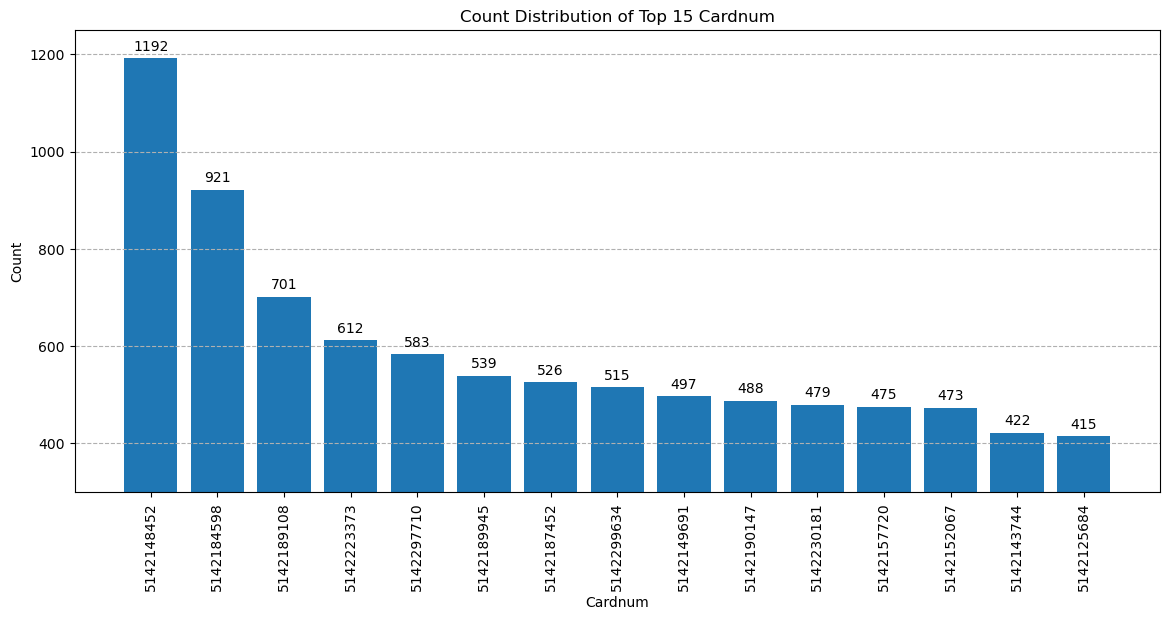

In [14]:
cardnum_counts = data['Cardnum'].value_counts()

top_n = 15  
top_cardnum_counts = cardnum_counts.head(top_n)

plt.figure(figsize=(14, 6))  
plt.rcParams.update({'font.size':10})
bars = plt.bar(top_cardnum_counts.index.astype(str), top_cardnum_counts.values)  
plt.xlabel('Cardnum')
plt.ylabel('Count')
plt.title('Count Distribution of Top 15 Cardnum')
plt.xticks(rotation=90)
plt.ylim(300, 1250)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, yval, ha='center', va='bottom')
    
plt.grid(axis='y', linestyle='--')

plt.show()


Field Name: Cardnum

Description: Card number (Cardnum). The distribution displays the top 15 occurrences of card numbers used. The most common card number is displayed at the peak, showing a total count of 1,192, indicating a high frequency of use which could signify a card favored for regular transactions or by a heavy user.

# 2. Merch zip

In [15]:
#transform Merch zip to categorical
data["Merch zip"] = data["Merch zip"].astype('category')
#group by Merch zip
merchzip_counts = data['Merch zip'].value_counts()
merchzip_counts

Merch zip
38118.0    11998
63103.0     1667
8701.0      1284
22202.0     1266
60061.0     1237
           ...  
46526.0        1
46402.0        1
46342.0        1
46322.0        1
99999.0        1
Name: count, Length: 4567, dtype: int64

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.ticker import FuncFormatter

# # Your existing code
# merch_zip_counts = data['Merch zip'].value_counts()
# #merch_zip_counts.index = merch_zip_counts.index.astype(int)
# top_15_merch_zip_counts = merch_zip_counts.head(15)

# # Create the figure and axis objects
# fig, ax = plt.subplots(figsize=(14, 6))

# # Plot the bar chart
# ax.bar(top_15_merch_zip_counts.index.astype(str), top_15_merch_zip_counts.values)

# # Set axis labels and title
# ax.set_xlabel('Merch zip')
# ax.set_ylabel('Count')
# ax.set_title('Count Distribution of Top 15 Merch zip')

# # Rotate the x-axis labels
# plt.xticks(rotation=90)

# # Define a function to format the y-axis tick labels
# def y_formatter(y, pos):
#     # Convert the tick value to a multiple of 1000
#     multiple = int(y / 1000)
#     return f"{multiple} * 10^3"

# # Create a FuncFormatter instance and set it as the y-axis major formatter
# formatter = FuncFormatter(y_formatter)
# ax.yaxis.set_major_formatter(formatter)

# bars = plt.bar(top_15_merch_zip_counts.index.astype(str), top_15_merch_zip_counts.values)  
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, yval, ha='center', va='bottom')
    
# plt.grid(axis='y', linestyle='--')
# #plt.ylim(400, 1800)


# plt.show()

NameError: name 'FuncFormatter' is not defined

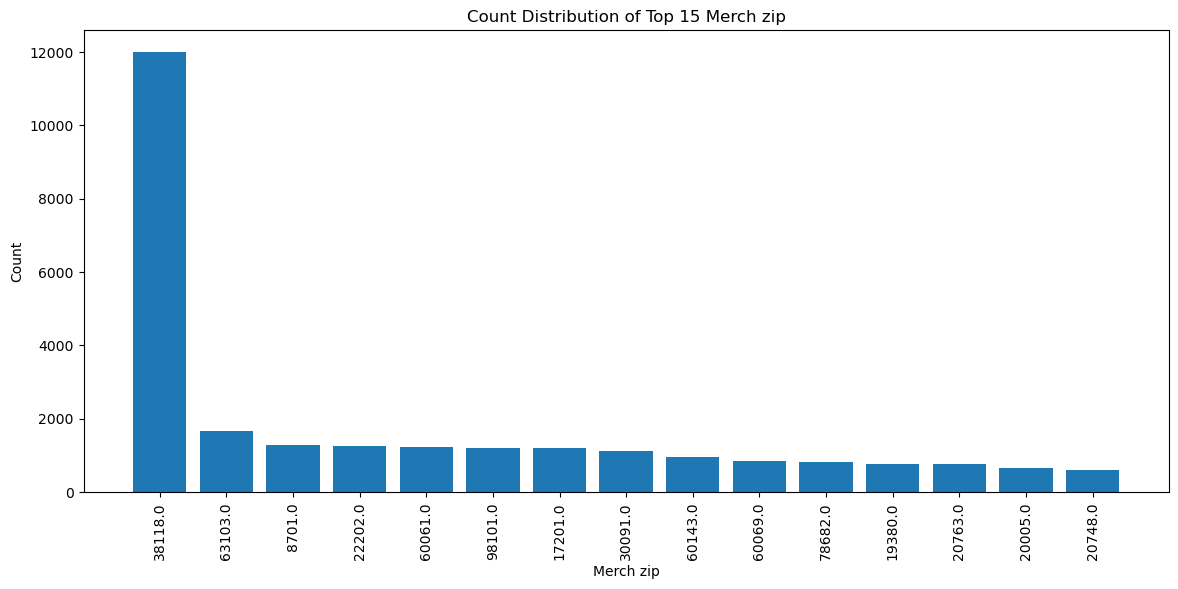

In [17]:


# Assuming data is a pandas DataFrame and 'Merch zip' is a column in it
# Your existing code for getting the counts
merch_zip_counts = data['Merch zip'].value_counts()
top_15_merch_zip_counts = merch_zip_counts.head(15)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the bar chart with blue color
bars = ax.bar(top_15_merch_zip_counts.index.astype(str), top_15_merch_zip_counts.values)

# Set axis labels and title
ax.set_xlabel('Merch zip')
ax.set_ylabel('Count')
ax.set_title('Count Distribution of Top 15 Merch zip')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Define a function to format the y-axis tick labels
def y_formatter(y, pos):
    # Convert the tick value to a multiple of 1000
    multiple = int(y / 1000)
    return f"{multiple} * 10^3"

# Create a FuncFormatter instance and set it as the y-axis major formatter
formatter = FuncFormatter(y_formatter)
ax.yaxis.set_major_formatter(formatter)

# Add text labels above the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--')

plt.show()


# 3. Amount

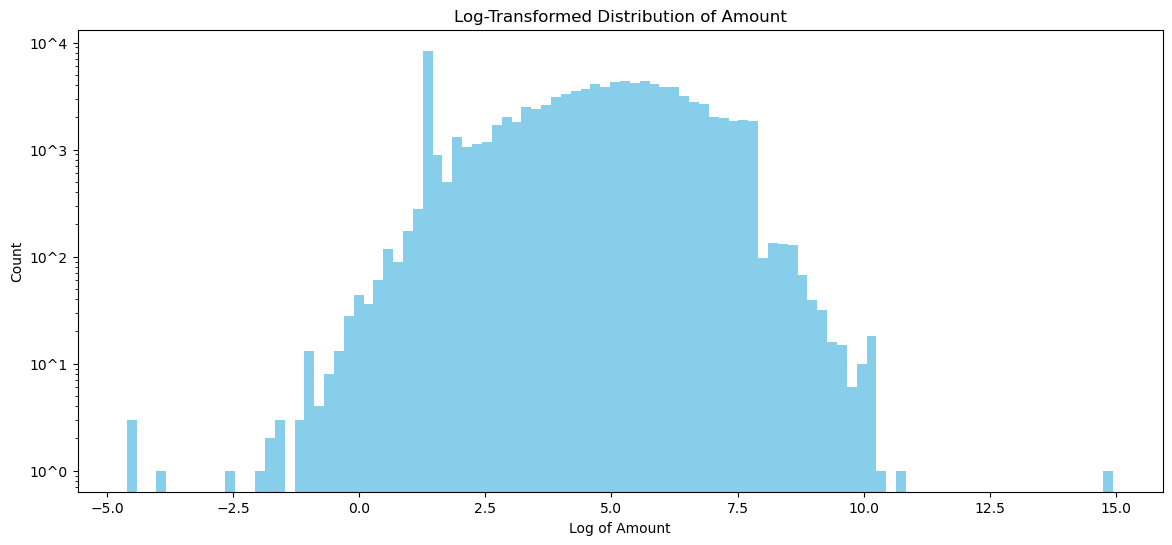

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Assuming log_amount is our data after log-transforming the 'Amount' column
log_amount = np.log(data[data['Amount'] > 0]['Amount'])

# Create the histogram figure
fig, ax = plt.subplots(figsize=(14, 6))
ax.hist(log_amount, bins=100, color='skyblue')

# Set the y-axis scale to logarithmic
ax.set_yscale('log')

# Define a function to format the y-axis tick labels as powers of 10
def y_formatter(y, pos):
    # Convert the tick value to a power of 10
    power = int(np.floor(np.log10(y)))
    return f"10^{power}"

# Create a FuncFormatter instance and set it as the y-axis major formatter
formatter = FuncFormatter(y_formatter)
ax.yaxis.set_major_formatter(formatter)

# Set axis labels and title
ax.set_xlabel('Log of Amount')
ax.set_ylabel('Count')
ax.set_title('Log-Transformed Distribution of Amount')

plt.show()

In [ ]:
print(numerics)

['Amount']


In [ ]:
# data_sorted = np.sort(data["Amount"])  # 对数据进行排序
# cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)  # 计算CDF

# plt.plot(data_sorted, cdf, marker='.', linestyle='none')  # 绘制CDF图
# plt.xlabel(col)  # X轴标签
# plt.ylabel('CDF')  # Y轴标签
# plt.title('CDF of ' + col)  # 图标题
# plt.grid(True)  # 显示网格
# plt.show()  # 显示图像

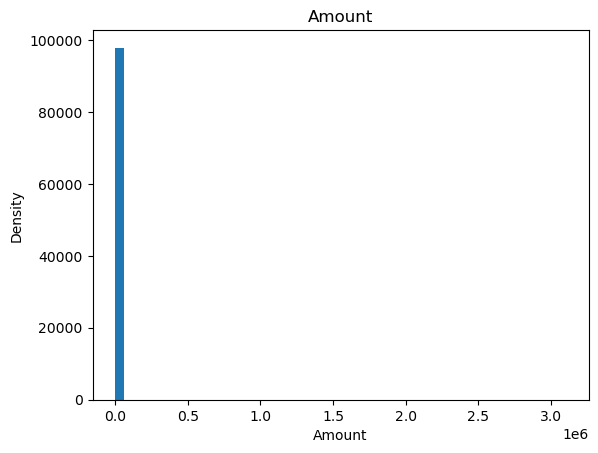

In [ ]:
for col in numerics:
    plt.hist(data[col],bins=50)
    #plt.xlim()
    plt.xlabel(col)
    #set x axis range from 1 to 10
    #plt.xlim(0,10000)
    #set y axis range from 0 to 50
    plt.ylabel('Density')
    plt.title(col)
    plt.show()

TypeError: 'str' object is not callable

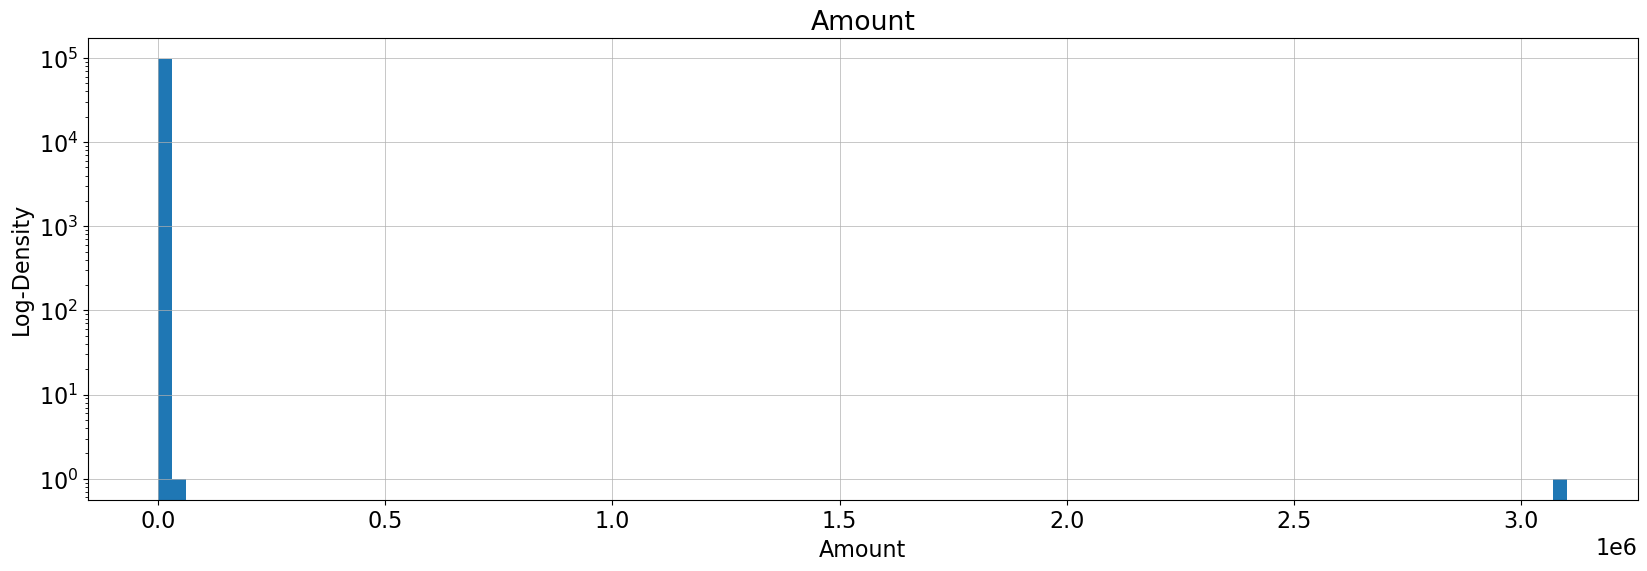

In [ ]:
# Your plotting code
for col in numerics:
    counts, bins, patches = plt.hist(data[col], bins=100)
    plt.yscale('log')  # Using log scale for y-axis

    plt.xlabel(col)
    plt.ylabel('Log-Density')
    plt.title(col)

    # Add grid lines
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    #plt.grid(which='minor', linestyle=':', linewidth='0.5')

    # Iterate through the list of patches to get the location and height of each bar
    for patch, count in zip(patches, counts):
        # Get the height and width of the bar
        height = patch.get_height()
        width = patch.get_width()
        x = patch.get_x() + width / 2  # Center the text horizontally

        if height > 0:  # Only annotate non-empty bars
            plt.text(x, height, str(int(count)), ha='center', va='bottom', fontsize=8)

    plt.show()


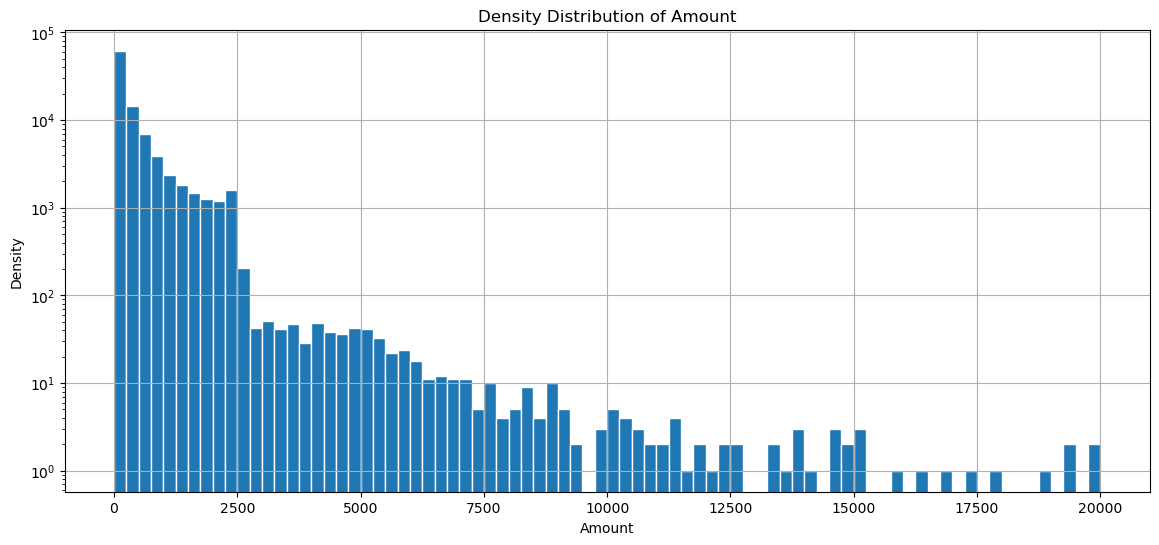

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('card transactions.csv')

# Assuming 'Amount' is the column from your data you want to plot
col = 'Amount'
counts, bins, patches = plt.hist(data[col], bins=80, range=(0, 20000), log=True, edgecolor='white')  # Adjust the range, bins, and edgecolor

plt.xlabel(col)
plt.ylabel('Density')
plt.title('Density Distribution of ' + col)
plt.grid(True)
plt.show()

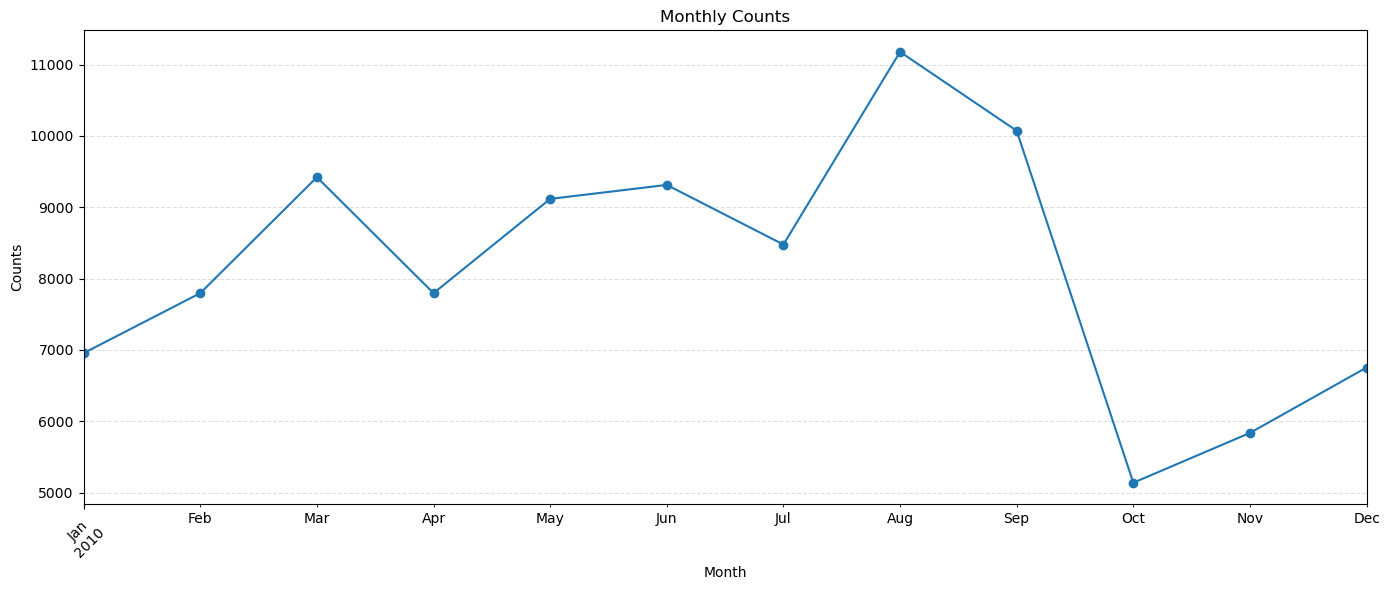

In [39]:
from matplotlib.ticker import FixedLocator

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y', errors='coerce')
# Drop rows where 'Date' could not be converted
data = data.dropna(subset=['Date'])

# Resample the data to get monthly counts
monthly_counts = data.set_index('Date').resample('MS').size()

# Now, directly plot using pandas built-in plot function
monthly_counts.plot(marker='o', figsize=(14, 6))

# Format the plot
plt.title('Monthly Counts')
plt.rcParams.update({'font.size':10})
plt.xlabel('Month')
plt.ylabel('Counts')
plt.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()


In [40]:
# # ... previous data processing ...

# # Resample the data to get daily counts
# daily_counts = data.set_index('Date').resample('D').size()

# # Now, directly plot using pandas built-in plot function
# daily_counts.plot(marker='o', figsize=(14, 6))

# # Format the plot
# plt.title('Daily Counts')
# plt.rcParams.update({'font.size':10})
# plt.xlabel('Month')
# plt.ylabel('Counts')
# plt.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
# plt.xticks(rotation=45)  # Rotate ticks as there will be more labels
# plt.tight_layout()  # Adjust layout to prevent overlap

# # Show the plot
# plt.show()


In [41]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import matplotlib.dates as mdates

# # ... your data processing ...

# # Resample the data to get daily counts
# daily_counts = data.set_index('Date').resample('D').size()

# # Use a line chart to connect the points
# plt.figure(figsize=(14, 6))  # Increase figure size
# plt.plot(daily_counts.index, daily_counts, marker='', linestyle='-')  # Use line only, no markers

# # Format the plot
# plt.title('Daily Counts')
# plt.xlabel('Month')
# plt.ylabel('Counts')
# plt.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

# # Set x-axis major ticks to monthly and format them
# ax = plt.gca()  # Get current axis
# ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set locator to every month
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format the label to show abbreviated month name

# # Manually add the year at the beginning or end of the axis
# start, end = daily_counts.index[0], daily_counts.index[-1]
# ax.text(start, ax.get_ylim()[0], start.strftime('%Y'), ha='center')
# # or for the end of the axis
# # ax.text(end, ax.get_ylim()[0], end.strftime('%Y'), ha='center')
# plt.gcf().autofmt_xdate()  # Auto format the x-axis labels to prevent overlap
# #plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()


/var/folders/f1/fyvg5jkd0rj6y6mjb8085rw80000gn/T/ipykernel_43598/2416797709.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(original_labels)


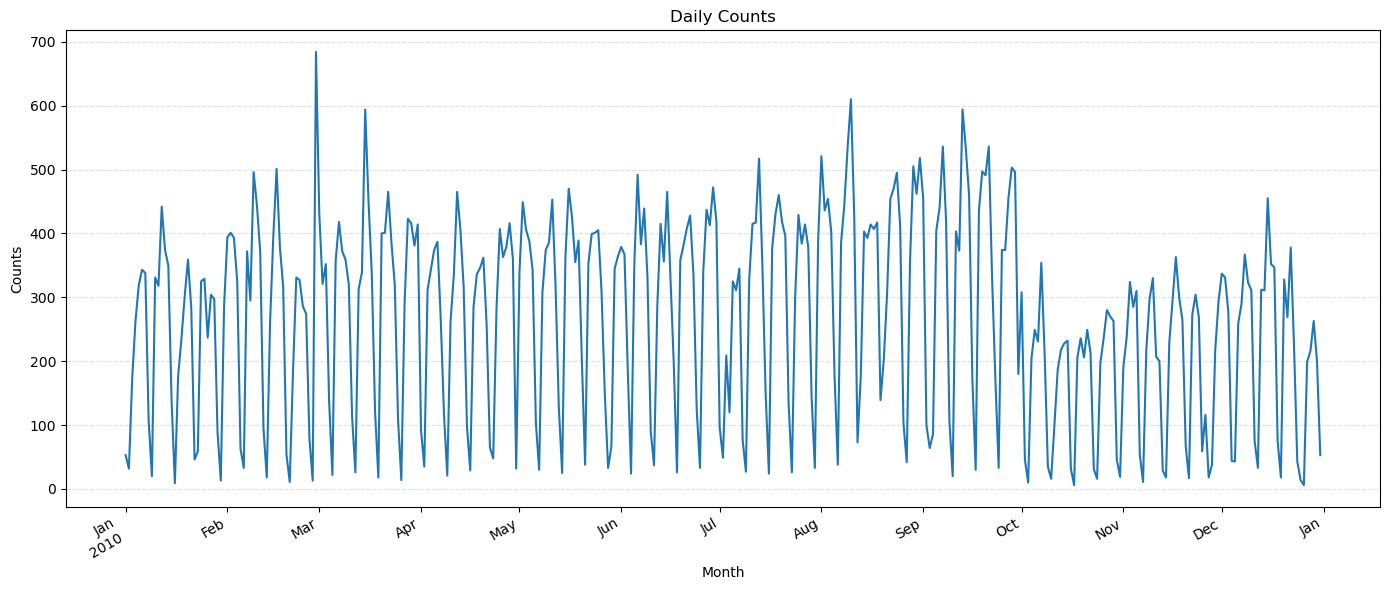

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# ... your data processing ...

# Resample the data to get daily counts
daily_counts = data.set_index('Date').resample('D').size()

# Use a line chart to connect the points
plt.figure(figsize=(14, 6))  # Increase figure size
plt.plot(daily_counts.index, daily_counts, marker='', linestyle='-')  # Use line only, no markers

# Format the plot
plt.title('Daily Counts')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

# Set x-axis major ticks to monthly and format them
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set locator to every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format the label to show abbreviated month name

# Get all the original x-tick labels
original_labels = [label.get_text() for label in ax.get_xticklabels()]

# Assuming that the first label corresponds to January, replace it with 'Jan\n2010'
if original_labels:
    original_labels[0] = 'Jan\n2010'

# Set the new labels
ax.set_xticklabels(original_labels)

plt.gcf().autofmt_xdate()  # Auto format the x-axis labels to prevent overlap
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


/var/folders/f1/fyvg5jkd0rj6y6mjb8085rw80000gn/T/ipykernel_43598/3967234439.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(original_labels, minor=False)


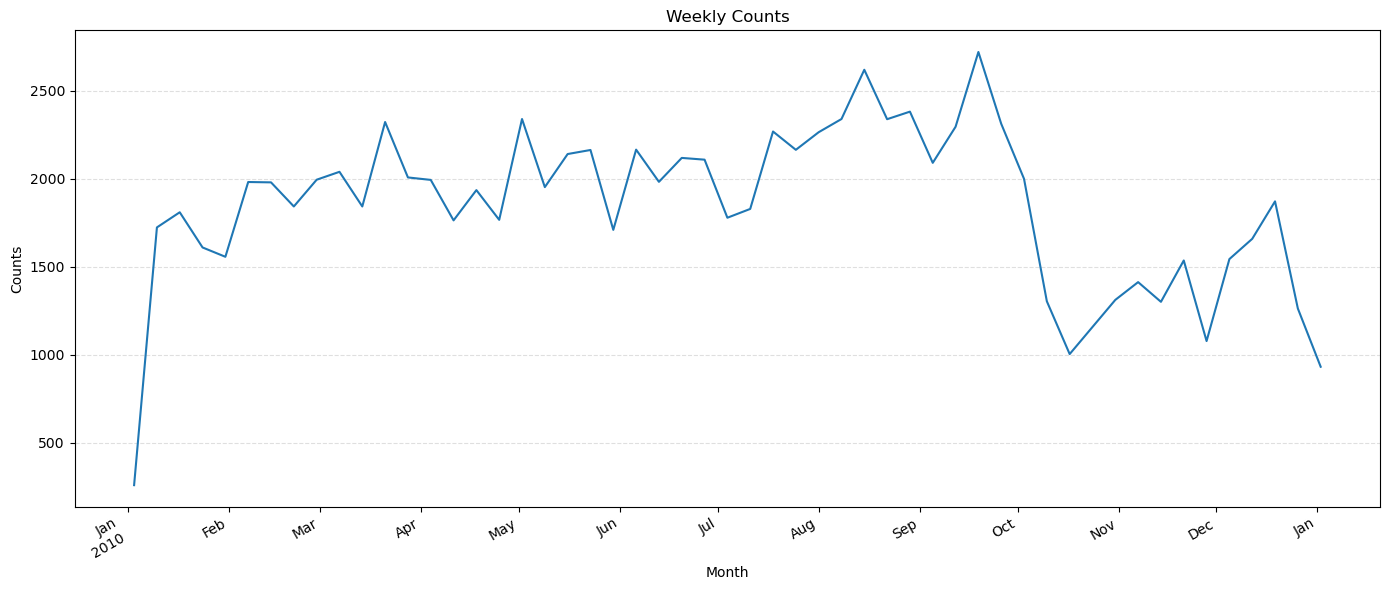

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# ... your data processing ...

# Resample the data to get weekly counts
weekly_counts = data.set_index('Date').resample('W').size()

# Use a line chart to connect the points
plt.figure(figsize=(14, 6))  # Increase figure size
plt.plot(weekly_counts.index, weekly_counts, marker='', linestyle='-')  # Use line only, no markers

# Format the plot
plt.title('Weekly Counts')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

# Set x-axis major ticks to monthly and format them
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set locator to every month
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())  # Set minor locator to every week
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format the label to show abbreviated month name

# Get all the original x-tick labels
original_labels = [label.get_text() for label in ax.get_xticklabels(which='major')]

# Assuming that the first label corresponds to January, replace it with 'Jan\n2010'
if original_labels:
    original_labels[0] = 'Jan\n2010'

# Set the new labels for major ticks (which are the months)
ax.set_xticklabels(original_labels, minor=False)

# Optional: Hide minor tick labels (weeks) to reduce clutter
ax.tick_params(axis='x', which='minor', length=0, labelsize=0)

plt.gcf().autofmt_xdate()  # Auto format the x-axis labels to prevent overlap
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


TypeError: 'str' object is not callable

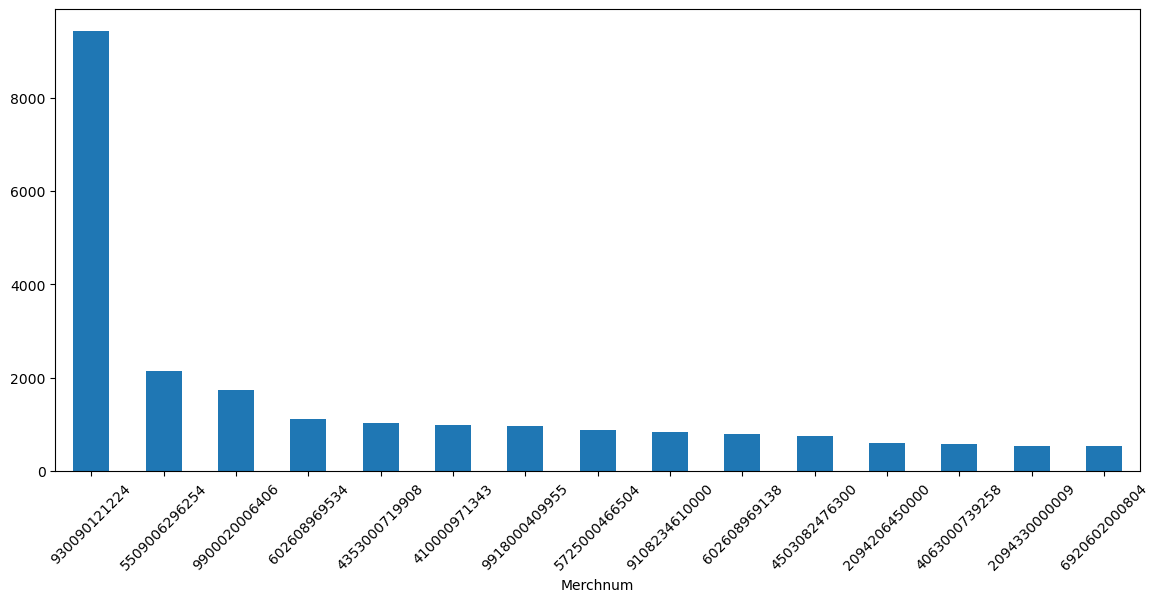

In [44]:
from matplotlib.ticker import FuncFormatter, MaxNLocator

categoricals_2 = ['Merchnum', 'Merch state']
plt.rcParams.update({'figure.figsize':(14,6)})

for col in categoricals_2:
    
    counts = data[col].value_counts().head(15)
    ax = counts.plot(kind='bar')
    plt.xticks(rotation=45)
    for i, v in enumerate(counts):
        ax.text(i, v + counts.max()*0.01, str(v), color='black', fontsize=8, ha='center')
        
    # Custom y-axis formatter to display '1K', '2K', '3K', etc.
    def y_formatter(y, pos):
        return f"{int(y/1000)}K" if y >= 1000 else '0'

    # Set major locator to ensure each 1k interval has a tick
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    # Create a FuncFormatter instance and set it as the y-axis major formatter
    formatter = FuncFormatter(y_formatter)
    ax.yaxis.set_major_formatter(formatter)

    plt.title(f'Counts by {col}')
    plt.xlabel(col)
    plt.ylabel('Counts')
    ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
    plt.show()


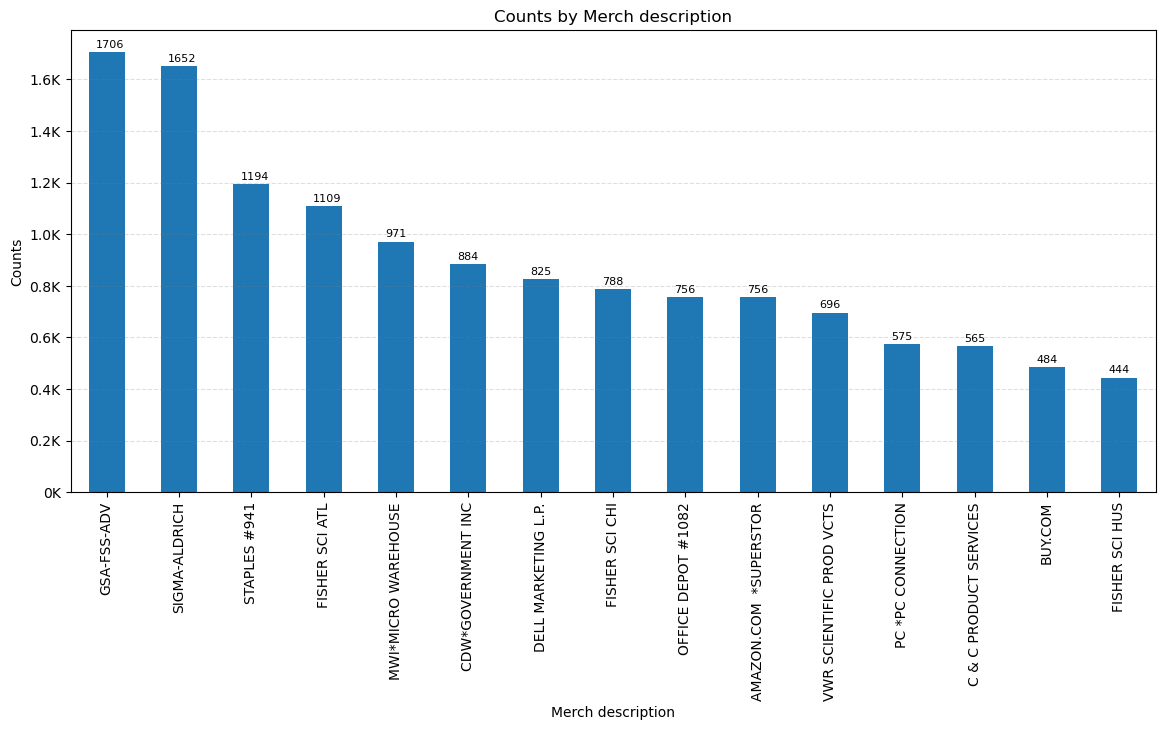

In [ ]:
# 'Merch description', 'Transtype', 'Recnum'
import matplotlib.ticker as ticker

counts = data['Merch description'].value_counts().head(15)
ax = counts.plot(kind='bar')
plt.xticks(rotation=90)
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', fontsize=8)
        
# def y_formatter(y, pos):
#     if y >= 1000:
#         # Convert the tick value to a multiple of 1000
#         multiple = int(y / 1000)
#         return f"{multiple}*10^3"
#     # Convert the tick value to a multiple of 100
#     elif y >= 100:
#         multiple = int(y / 100)
#         return f"{multiple}*10^2"

# # Create a FuncFormatter instance and set it as the y-axis major formatter
# formatter = FuncFormatter(y_formatter)
# ax.yaxis.set_major_formatter(formatter)

def custom_formatter(x, pos):
    return '{:.1f}K'.format(x/1000) if x != 0 else '0K'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

plt.title('Counts by Merch description')
plt.xlabel('Merch description')
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.show()

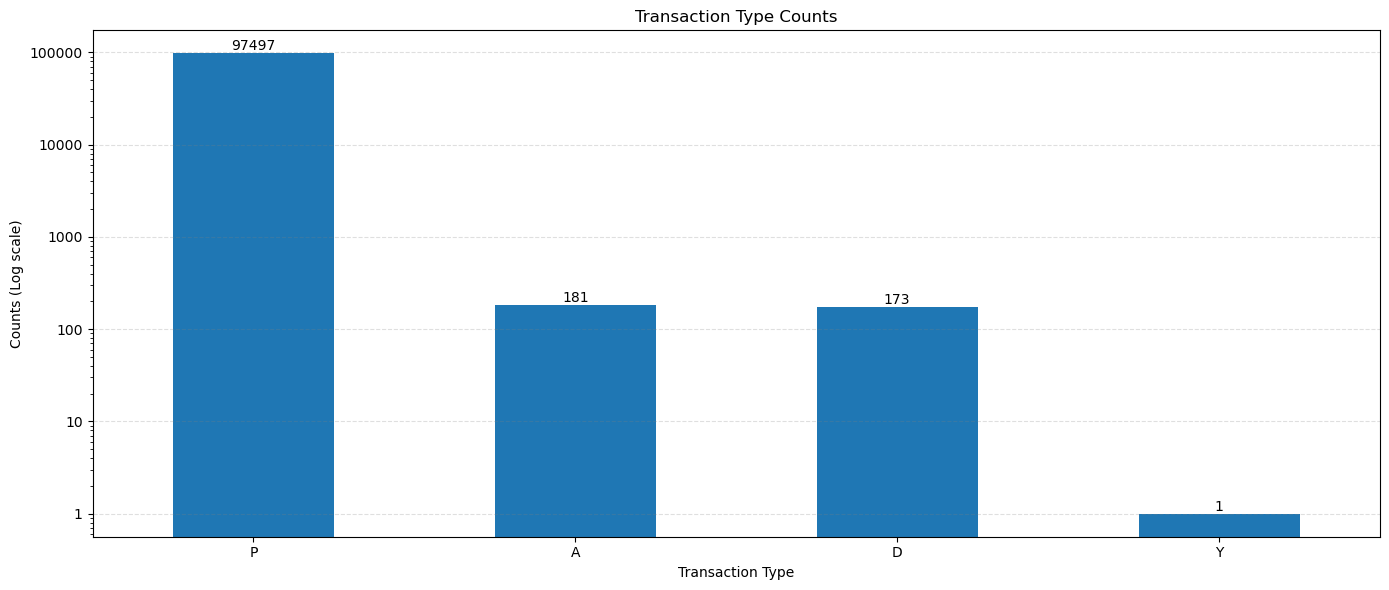

In [ ]:
col = 'Transtype'
counts = data[col].value_counts().head(15)
ax = counts.plot(kind='bar', figsize=(14, 6))  # Adjust the figure size as needed
ax.set_yscale('log')  # Set the y-axis to a logarithmic scale

# Format the y-axis ticks in scientific notation for better readability on a log scale
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xticks(rotation=0)
for i, v in enumerate(counts):
    # The labels now should be positioned based on the log value
    label_height = v if v > 0 else 1
    ax.text(i, label_height, f"{v:.0f}", color='black', fontsize=10, va='bottom', ha='center')

plt.title('Transaction Type Counts')
plt.xlabel('Transaction Type')
plt.ylabel('Counts (Log scale)')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.tight_layout()  # Automatically adjust the layout
plt.show()


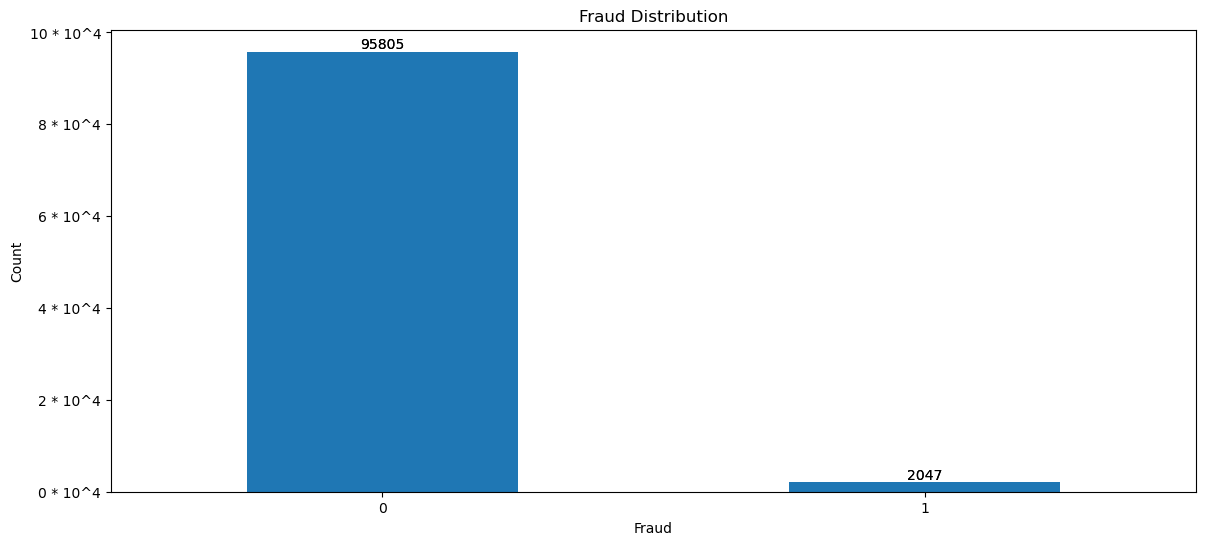

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming 'data' is your DataFrame and it has a column named 'Fraud'

# Define a function to format the y-axis tick labels
def y_formatter(y, pos):
    # Convert the tick value to a multiple of 1000
    multiple = int(y / 10000)
    return f"{multiple} * 10^4"

# Draw the plot of the distribution
plt.figure(figsize=(14, 6))
ax = data['Fraud'].value_counts().plot(kind='bar')  # 'ax' is now defined here

fraud_counts = data['Fraud'].value_counts()
bars = fraud_counts.plot(kind='bar')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{int(bar.get_height())}', 
             ha='center', 
             va='bottom')
    
# Create a FuncFormatter instance and set it as the y-axis major formatter
formatter = FuncFormatter(y_formatter)
ax.yaxis.set_major_formatter(formatter)
plt.rcParams.update({'font.size':10})
plt.title('Fraud Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# # plot categorical histograms if desired
# for col in categoricals:
#     counts = data[col].value_counts().head(20)
#     ax = counts.plot(kind='bar')
#     plt.xticks(rotation=90)
#     for i, v in enumerate(counts):
#         ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', fontsize=10)

#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel('Counts')
#     ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
#     plt.show()

## The cell below is for supervised problem with a dependent variable y. It looks at the univariate relationship between x and y.

overall response rate is:  0.02091934758615051
97852 different values for Recnum
1645 different values for Cardnum
365 different values for Date
13091 different values for Merchnum
13126 different values for Merch description
227 different values for Merch state
4567 different values for Merch zip


/var/folders/f1/fyvg5jkd0rj6y6mjb8085rw80000gn/T/ipykernel_43598/1635616917.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[dep_var].replace('no',0,inplace=True)
/var/folders/f1/fyvg5jkd0rj6y6mjb8085rw80000gn/T/ipykernel_43598/1635616917.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

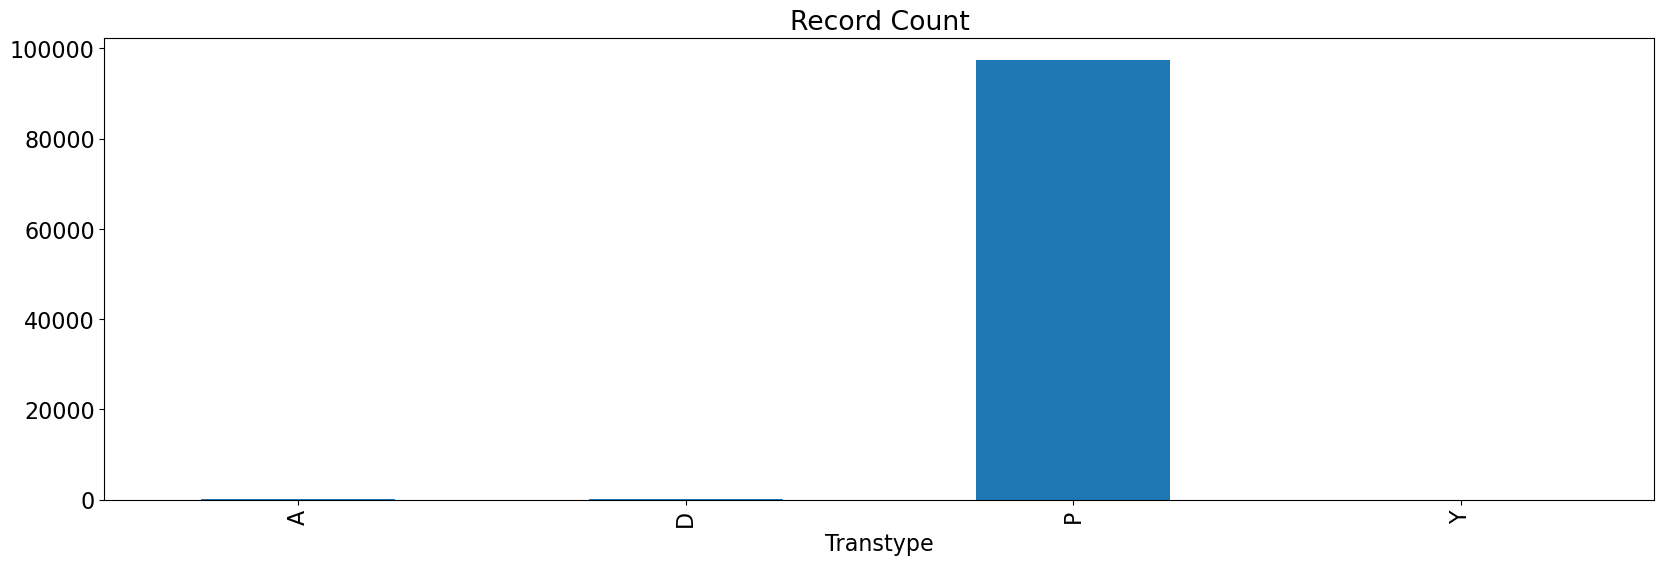

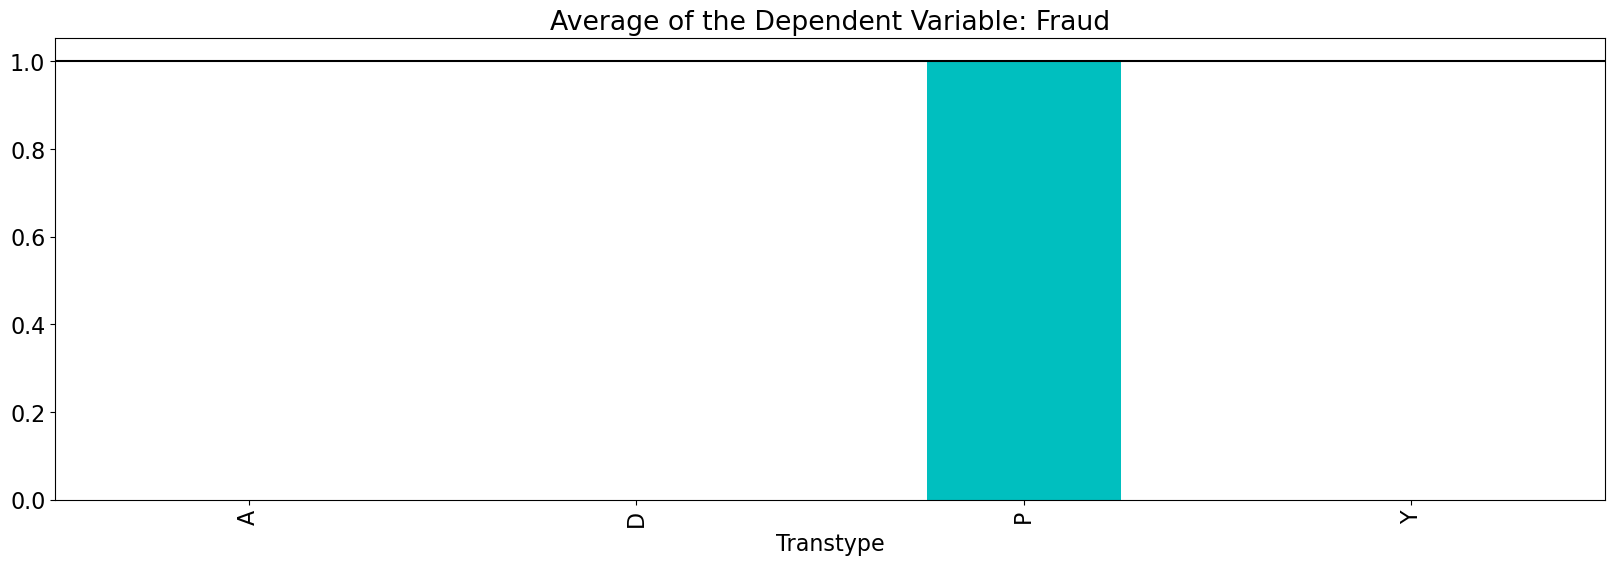

35331 different values for Amount


In [ ]:
dep_var = 'Fraud'

# sometimes need to convert the dependent variable to a number:
data[dep_var].replace('no',0,inplace=True)
data[dep_var].replace('yes',1,inplace=True)

rate = data[dep_var].mean()

print('overall response rate is: ', rate)
# Plot field distributions and compare with average of the dependent variable y (horizontal line)
plt.rcParams["figure.figsize"] = [20,6]
plt.rcParams.update({'font.size': 16})
plot_cols=data.columns.tolist()
plot_cols.remove(dep_var)
for col in plot_cols:
    num = data[col].nunique()
    if num > 100:
        print(num,"different values for",col)
    else:
        plt.title('Record Count')
        plt.xlabel(col)
        data[col].value_counts().sort_index().plot(kind='bar')
        temp = data.groupby(col)[dep_var].mean() / rate
        plt.show()
        plt.xlabel(col)
        str = 'Average of the Dependent Variable: '+dep_var
        plt.title(str)
        plt.axhline(1,color='black')
        temp.plot(kind='bar',color='c')
        plt.show()

In [ ]:
print('duration: ', dt.datetime.now() - start_time)

duration:  0:01:21.751611
